In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('data.csv')
data

,Unnamed: 0,D_length,D_weight,y
0,0,25.4,242.0,0.0
1,1,26.3,290.0,0.0
2,2,26.5,340.0,0.0
3,3,29.0,363.0,0.0
4,4,29.0,430.0,0.0
5,5,29.7,450.0,0.0
6,6,29.7,500.0,0.0
7,7,30.0,390.0,0.0
8,8,30.0,450.0,0.0
9,9,30.7,500.0,0.0


In [4]:
# 입력 데이터 하나로는 학습만 시킬 수 있고 테스트는 못함
X = pd.DataFrame(data, columns= ['D_length', 'D_weight'])
Y = pd.DataFrame(data, columns= ['y'])

In [11]:
# 처리하기 쉽게 데이터를 넘파이 배열로 변경
np_X = np.array(X)
np_Y = np.array(Y['y'])

In [12]:
# 데이터가 순서대로 정렬되어 있으면 학습할 때 한 쪽으로 치우친 데이터만 학습하게 됨
np.random.seed(10)  # 시드를 지정해서 항상 같은 랜덤 값이 나오도록함
ck = np.arange(49)
np.random.shuffle(ck)
ck

array([37, 23, 43, 41, 46, 20,  3, 30,  7,  6, 38,  2, 39, 32, 10, 21, 35,
       27, 18, 31,  1, 12, 34, 44, 26,  5, 13, 22, 19, 17, 14,  4, 40, 33,
       24, 11, 16, 47, 45, 48,  8, 42, 29, 25, 28,  0, 15, 36,  9])

In [16]:
t_x = np_X[ck[:35]]  # 입력 데이터
tt_x = np_X[ck[35:]]  # 테스트 데이터
t_y = np_Y[ck[:35]]  # 학습용 정답 데이터
tt_y = np_Y[ck[35:]]  # 테스트용 정답 데이터

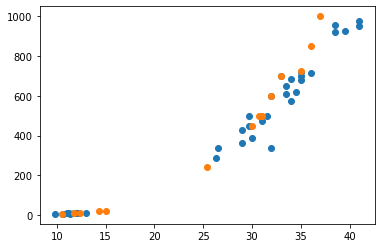

In [17]:
plt.scatter(t_x[:, 0], t_x[:, 1])
plt.scatter(tt_x[:, 0], tt_x[:, 1])

In [20]:
kn = KNeighborsClassifier().fit(t_x, t_y)  # 모델 생성, 학습

In [21]:
kn.score(tt_x, tt_y)  # 점수 체크

1.0

In [22]:
kn.predict(tt_x)

array([0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.])

In [23]:
tt_y

array([0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.])

In [26]:
# 데이터 전처리 중요성
# 라이브러리를 사용해서 위 과정을 간단하게 구현

from sklearn.model_selection import train_test_split

sk_t_x, sk_tt_x, sk_t_y, sk_tt_y = train_test_split(X, Y, random_state= 42)  # 입력되는 데이터는 데이터 프레임, 넘파이 배열 모두 가능

In [27]:
kn1 = KNeighborsClassifier().fit(sk_t_x, sk_t_y)

C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [28]:
kn1.predict([[25, 150]])

array([1.])

In [59]:
d, i = kn.kneighbors([[25, 150]])

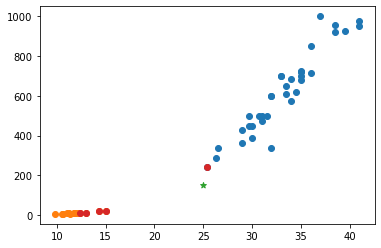

In [56]:
kn1=KNeighborsClassifier().fit(np_X,np_Y)

plt.scatter(np_X[:35,0],np_X[:35,1])#0
plt.scatter(np_X[35:,0],np_X[35:,1])#1
plt.scatter(25,150,marker='*')
d1,i1=kn1.kneighbors([[25,150]])
plt.scatter(np_X[i1,0],np_X[i1,1],marker='o')

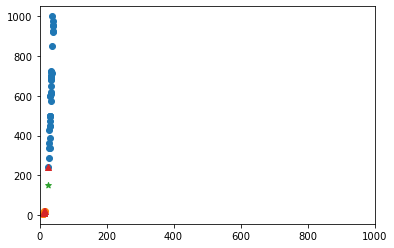

In [57]:
plt.scatter(np_X[:35,0],np_X[:35,1])#0
plt.scatter(np_X[35:,0],np_X[35:,1])#1
plt.scatter(25,150,marker='*')
plt.xlim((0,1000))
plt.scatter(np_X[i1,0],np_X[i1,1],marker='^')

In [46]:
# z-스코어 스케일링

mean = np.mean(np_X, axis= 0)
std = np.std(np_X, axis= 0)

In [49]:
sc_t_x = (np_X - mean) / std
sc_d = ([25, 150] - mean) / std

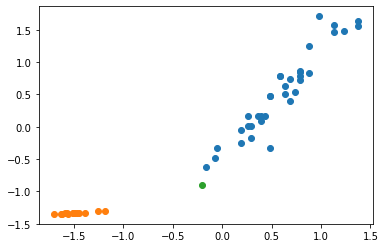

In [50]:
plt.scatter(sc_t_x[:35, 0], sc_t_x[:35, 1])
plt.scatter(sc_t_x[35:, 0], sc_t_x[35:, 1])
plt.scatter(sc_d[0], sc_d[1], marker= 'o') # 학습 데이터부터 잘못되어 있어서 결과가 이상하게 나옴

In [52]:
# 학습부터 다시

kn2 = KNeighborsClassifier().fit(sc_t_x, np_Y)

d, i = kn2.kneighbors([sc_d])

In [53]:
kn2.predict([sc_d])

array([0.])

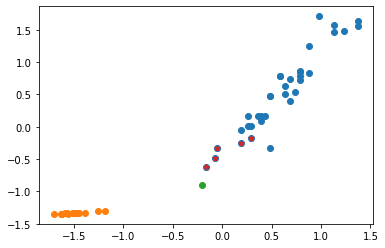

In [54]:
plt.scatter(sc_t_x[:35, 0], sc_t_x[:35, 1])
plt.scatter(sc_t_x[35:, 0], sc_t_x[35:, 1])
plt.scatter(sc_d[0], sc_d[1], marker= 'o')
plt.scatter(sc_t_x[i, 0], sc_t_x[i, 1], marker= '*')